<a href="https://colab.research.google.com/github/nandanajayachandran/NANDANA_J_ICT_ASSIGNMENTS_CASE_STUDIES/blob/main/Assignment_4_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSIGNMENT:-4 ON ANN**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Loading the dataset
data = pd.read_csv('/content/mobile_price_classification.csv')
data

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [ ]:
data.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**PREPROCESSING**

In [ ]:
data.isna().sum()

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

**There are no null values in the dataset**

**HANDLING OUTLIERS**

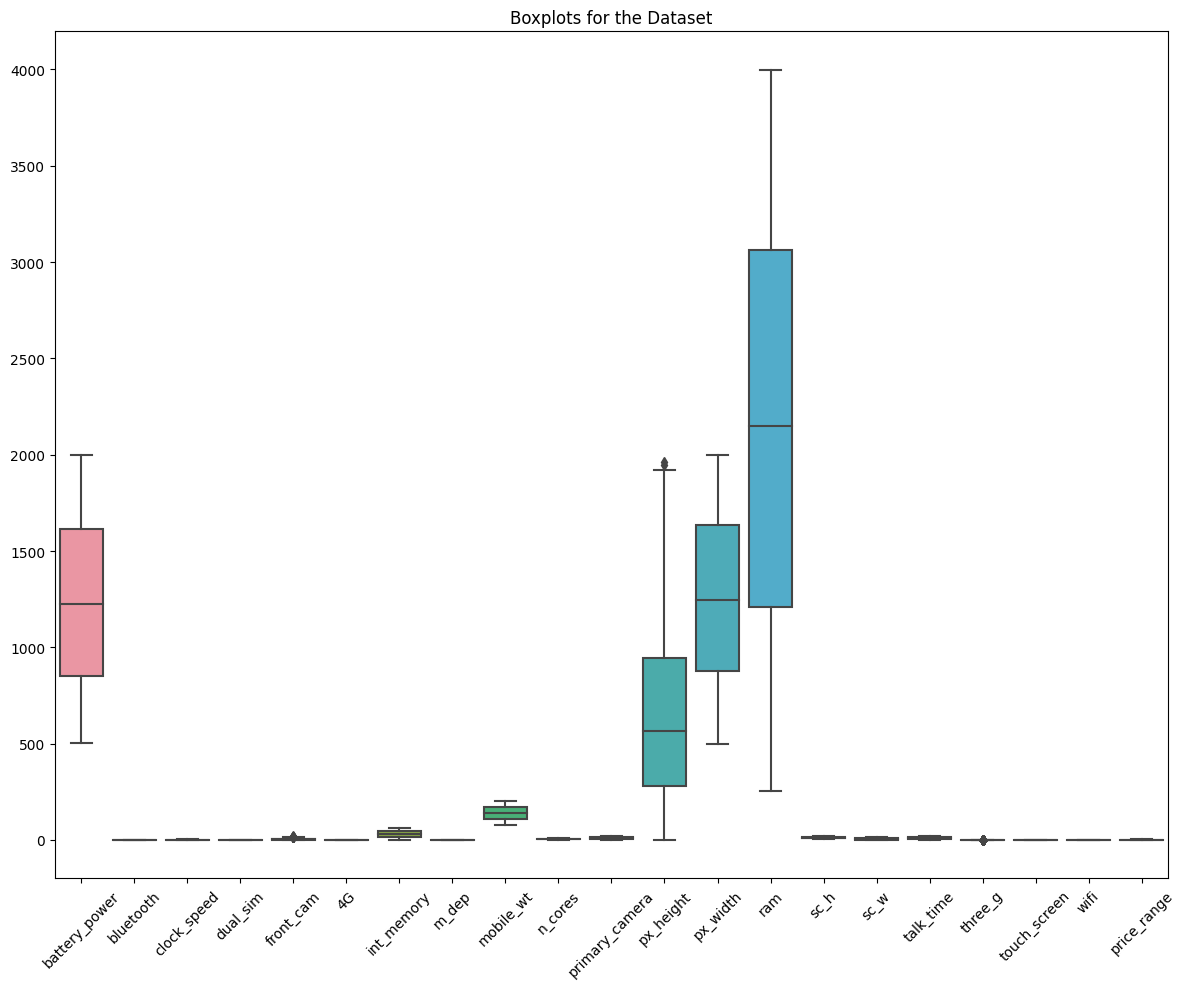

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.title("Boxplots for the Dataset")
# Creating box plot
sns.boxplot(data)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Separating features and labels
X = data.drop('price_range', axis=1)
y = data['price_range']

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

**LABEL ENCODING**

In [16]:
#Converting labels to numerical values using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**STANDARDIZATION**

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
#One-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=4)

**NEURAL NETWORK MODEL**

In [29]:
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
#Building the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [30]:
#Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
#Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2085 - accuracy: 0.9563 - val_loss: 0.2683 - val_accuracy: 0.9156
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1821 - accuracy: 0.9672 - val_loss: 0.2517 - val_accuracy: 0.9062
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1596 - accuracy: 0.9719 - val_loss: 0.2364 - val_accuracy: 0.9187
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1413 - accuracy: 0.9758 - val_loss: 0.2296 - val_accuracy: 0.9187
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1273 - accuracy: 0.9758 - val_loss: 0.2119 - val_accuracy: 0.9156
Epoch 6/100
40/40 [==============================] - 0s 6ms/step - loss: 0.1144 - accuracy: 0.9797 - val_loss: 0.2114 - val_accuracy: 0.9250
Epoch 7/100
40/40 [==============================] - 0s 6ms/step - loss: 0.1033 - accuracy: 0.9812 - val_loss: 0.2035 - val_accuracy: 0.9219
Epoch 8/100
4

In [34]:
#Evaluating the model on the test set
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

13/13 [==============================] - 0s 2ms/step
Accuracy: 0.925


In [35]:
#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       105
           1       0.88      0.91      0.90        91
           2       0.92      0.86      0.89        92
           3       0.94      0.96      0.95       112

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.93      0.93      0.92       400



**Bob's neural network-based classifier achieves an accuracy of 93% in predicting mobile phone price ranges. The model demonstrates strong precision, recall, and F1-score across different price classes, showcasing its ability. Overall, the model's performance underscores its value in aiding Bob's pursuit to compete with industry leaders like Apple and Samsung.**

Submitted by,
Nandana J.
ML/AI August Batch